# Unit 5 - Financial Planning


In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv("Keys.env")

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets

my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"



In [5]:
# Fetch current BTC price
btc_response = requests.get(btc_url).json()
btc_price = btc_response["data"]["1"]["quotes"]["USD"]["price"]

In [6]:
# Fetch current ETH price
eth_response = requests.get(eth_url).json()
eth_price = eth_response["data"]["1027"]["quotes"]["USD"]["price"]

In [7]:
# Compute current value of my crpto
my_btc_value = btc_price * my_btc
my_eth_value = eth_price * my_eth
my_eth_value 

11873.802

In [8]:
# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $60213.60
The current value of your 5.3 ETH is $11873.80


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [9]:
# Current amount of shares
my_agg = 200
my_spy = 50

In [10]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [11]:
# Format current date as ISO format
today = pd.Timestamp("2021-04-17", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
df_portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    start = today,
).df

# Preview DataFrame
df_portfolio.head()

AGG                                         SPY  \
                             open     high       low   close   volume    open   
time                                                                            
2021-04-19 00:00:00-04:00  114.00  114.500  114.0000  114.44  4820664  416.26   
2021-04-20 00:00:00-04:00  114.42  114.670  114.3900  114.62  3674209  413.91   
2021-04-21 00:00:00-04:00  114.60  114.740  114.5300  114.74  5250384  411.51   
2021-04-22 00:00:00-04:00  114.74  114.800  114.5900  114.77  3518947  415.88   
2021-04-23 00:00:00-04:00  114.81  115.086  114.6415  114.75  3506457  412.87   

                                                               
                               high     low   close    volume  
time                                                           
2021-04-19 00:00:00-04:00  416.7400  413.79  415.24  66226327  
2021-04-20 00:00:00-04:00  415.0859  410.59  412.22  69715050  
2021-04-21 00:00:00-04:00  416.2900  411.36  416.08  54772634  
2021-04-22 00:00:00-04:00  416.7800  411.13  412.30  90086341  
2021-04-23 00:00:00-04:00  418.2500  412.79  416.72  62184753

In [12]:
# Pick AGG and SPY close prices
agg_close_price = float(df_portfolio["AGG"]["close"][0])
spy_close_price = float(df_portfolio["SPY"]["close"][0])

In [13]:
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $114.44
Current SPY closing price: $415.24


In [14]:
# Compute the current value of shares
my_spy_value = my_spy * spy_close_price
my_agg_value = my_agg * agg_close_price
# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $20762.00
The current value of your 200 AGG shares is $22888.00


### Savings Health Analysis

In [15]:
# Set monthly household income
monthly_income = 12000


saving_data = [
    my_btc_value + my_eth_value,
    my_spy_value + my_agg_value
]

# Create savings DataFrame
df_savings = pd.DataFrame(saving_data, columns=["amount"], index = ["crypto", "shares"])

# Display savings DataFrame
display(df_savings)

,amount
crypto,72087.402
shares,43650.000


<AxesSubplot:title={'center':'My Personal Savings'}, ylabel='amount'>

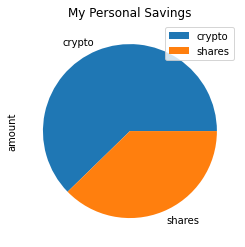

In [16]:
# Plot savings pie chart
df_savings.plot.pie(y="amount", title= "My Personal Savings")

In [17]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = float(df_savings.sum())
# Validate saving health
if total_savings > emergency_fund:
    print("Congratulations! You have enough money in your emergency fund.")
elif total_savings == emergency_fund:
    print("Good,  you have as much as 3 times your monthly income in your emergency fund.")
else:
    print(f"you need ${(emergency_fund - total_savings):0.2f} to reach your minimum emergency fund goal.")

Congratulations! You have enough money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [18]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2015-04-16', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-04-16', tz='America/New_York').isoformat()

In [19]:
# Get 5 years' worth of historical data for SPY and AGG
df_stock_data = alpaca.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df

# Display sample data
df_stock_data.head()

AGG                                         SPY  \
                             open     high       low   close   volume    open   
time                                                                            
2020-11-20 00:00:00-05:00  118.19  118.340  118.1300  118.29  5496191  357.50   
2020-11-23 00:00:00-05:00  118.28  118.300  118.1734  118.27  3844326  357.28   
2020-11-24 00:00:00-05:00  118.24  118.280  118.0700  118.09  4113975  360.21   
2020-11-25 00:00:00-05:00  118.15  118.210  118.0200  118.08  3739909  363.13   
2020-11-27 00:00:00-05:00  118.25  118.285  118.2200  118.27  4646812  363.84   

                                                               
                              high      low   close    volume  
time                                                           
2020-11-20 00:00:00-05:00  357.720  355.250  355.34  47947194  
2020-11-23 00:00:00-05:00  358.790  354.865  357.47  49938331  
2020-11-24 00:00:00-05:00  363.805  359.290  363.19  49862168  
2020-11-25 00:00:00-05:00  363.160  361.480  362.65  35309156  
2020-11-27 00:00:00-05:00  364.180  362.580  363.65  46840189

In [20]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
Mc_thirty_year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252 * 30

)

In [21]:
# Printing the simulation input data
Mc_thirty_year.portfolio_data.head()

AGG                                      \
                             open     high       low   close   volume   
time                                                                    
2020-11-20 00:00:00-05:00  118.19  118.340  118.1300  118.29  5496191   
2020-11-23 00:00:00-05:00  118.28  118.300  118.1734  118.27  3844326   
2020-11-24 00:00:00-05:00  118.24  118.280  118.0700  118.09  4113975   
2020-11-25 00:00:00-05:00  118.15  118.210  118.0200  118.08  3739909   
2020-11-27 00:00:00-05:00  118.25  118.285  118.2200  118.27  4646812   

                                           SPY                            \
                          daily_return    open     high      low   close   
time                                                                       
2020-11-20 00:00:00-05:00          NaN  357.50  357.720  355.250  355.34   
2020-11-23 00:00:00-05:00    -0.000169  357.28  358.790  354.865  357.47   
2020-11-24 00:00:00-05:00    -0.001522  360.21  363.805  359.290  363.19   
2020-11-25 00:00:00-05:00    -0.000085  363.13  363.160  361.480  362.65   
2020-11-27 00:00:00-05:00     0.001609  363.84  364.180  362.580  363.65   

                                                  
                             volume daily_return  
time                                              
2020-11-20 00:00:00-05:00  47947194          NaN  
2020-11-23 00:00:00-05:00  49938331     0.005994  
2020-11-24 00:00:00-05:00  49862168     0.016001  
2020-11-25 00:00:00-05:00  35309156    -0.001487  
2020-11-27 00:00:00-05:00  46840189     0.002757

In [22]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
Mc_thirty_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.005983,1.003422,0.996579,1.004583,1.003925,0.995341,1.005374,0.995231,0.999107,0.999286,...,0.998176,0.999393,0.989385,1.005081,0.998561,1.004082,1.011533,0.996415,1.004605,1.001732
2,1.009936,1.002418,1.003275,1.004972,0.998447,0.991062,1.022938,0.995689,1.003108,1.003151,...,1.003833,0.999600,0.997352,1.007069,1.002323,1.005225,1.014614,0.997911,1.009142,1.005545
3,1.013539,1.007262,1.002490,1.005881,1.007613,0.990312,1.023891,0.980356,1.015000,0.991234,...,1.006949,1.005385,0.989558,1.001170,1.005404,1.015084,1.011968,0.995071,0.998138,0.997402
4,1.025275,1.000871,1.002415,1.013699,1.005695,0.989692,1.030000,0.975023,1.016014,0.985095,...,1.007797,1.006487,0.994637,1.003536,1.006764,1.007226,1.014736,0.993228,1.005392,0.998076
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,980.085109,430.566742,641.692898,501.521963,514.337652,724.434187,755.627749,561.698651,455.449827,541.215876,...,825.642086,675.330383,215.560374,465.864673,940.996932,664.031775,337.662467,629.003099,1213.841486,661.526642
7557,980.426034,430.627335,641.339550,502.726445,511.529114,723.329351,749.351593,560.335880,456.730002,547.792744,...,826.019042,675.875650,214.926369,465.842471,944.600318,666.646699,337.745133,631.782172,1209.162092,657.471208
7558,983.229006,431.749688,639.112955,503.279348,511.727986,726.911817,753.384655,559.607535,458.435659,547.662268,...,827.690678,677.140835,216.418388,467.423305,945.156886,663.505484,334.887025,629.305162,1209.105244,661.535617
7559,975.341193,430.408678,641.787671,506.699337,508.887762,722.755902,759.562559,557.749137,460.607932,548.771159,...,818.458139,679.510128,216.707371,470.357223,944.253306,653.536685,337.869115,632.480337,1205.192308,660.657736


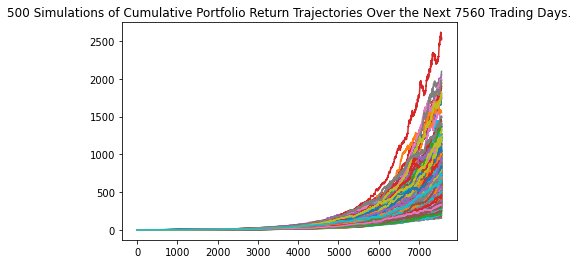

In [23]:
# Plot simulation outcomes
line_plot = Mc_thirty_year.plot_simulation()

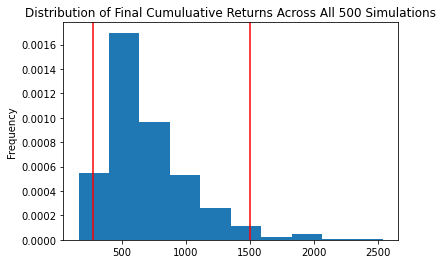

In [24]:
# Plot probability distribution and confidence intervals
dist_plot = Mc_thirty_year.plot_distribution()

### Retirement Analysis

In [25]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = Mc_thirty_year.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count            500.000000
mean             697.717626
std              336.279850
min              159.484639
25%              471.560490
50%              618.173110
75%              847.403374
max             2538.903636
95% CI Lower     273.073532
95% CI Upper    1499.869930
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [26]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl[8]*20000,2)
ci_upper = round(tbl[9]*20000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $5461470.65 and $29997398.61


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [27]:
# Set initial investment
initial_investment30 = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(tbl[8]*(20000 * 1.5),2)
ci_upper = round(tbl[9]*(20000 * 1.5),2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment30} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $8192205.97 and $44996097.91


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [28]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
Mc_five_year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252 * 5

)

In [29]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
Mc_five_year.portfolio_data.head()

AGG                                      \
                             open     high       low   close   volume   
time                                                                    
2020-11-20 00:00:00-05:00  118.19  118.340  118.1300  118.29  5496191   
2020-11-23 00:00:00-05:00  118.28  118.300  118.1734  118.27  3844326   
2020-11-24 00:00:00-05:00  118.24  118.280  118.0700  118.09  4113975   
2020-11-25 00:00:00-05:00  118.15  118.210  118.0200  118.08  3739909   
2020-11-27 00:00:00-05:00  118.25  118.285  118.2200  118.27  4646812   

                                           SPY                            \
                          daily_return    open     high      low   close   
time                                                                       
2020-11-20 00:00:00-05:00          NaN  357.50  357.720  355.250  355.34   
2020-11-23 00:00:00-05:00    -0.000169  357.28  358.790  354.865  357.47   
2020-11-24 00:00:00-05:00    -0.001522  360.21  363.805  359.290  363.19   
2020-11-25 00:00:00-05:00    -0.000085  363.13  363.160  361.480  362.65   
2020-11-27 00:00:00-05:00     0.001609  363.84  364.180  362.580  363.65   

                                                  
                             volume daily_return  
time                                              
2020-11-20 00:00:00-05:00  47947194          NaN  
2020-11-23 00:00:00-05:00  49938331     0.005994  
2020-11-24 00:00:00-05:00  49862168     0.016001  
2020-11-25 00:00:00-05:00  35309156    -0.001487  
2020-11-27 00:00:00-05:00  46840189     0.002757

In [30]:
Mc_five_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.001053,1.006688,0.999771,1.003227,1.001993,0.997847,1.006787,1.008183,1.009089,0.999669,...,1.006398,1.002555,0.997609,0.997197,1.010769,1.005029,1.002695,1.002352,0.998161,0.998104
2,1.001934,1.008591,1.002375,1.014309,1.003514,0.996650,1.009290,1.017954,1.007991,0.994696,...,0.999542,0.997323,0.997441,0.997864,1.013054,1.004845,1.001707,1.013175,0.995194,0.996618
3,0.998520,1.006036,1.000298,1.030888,1.000179,1.002342,1.003211,1.026119,1.020382,0.992015,...,1.001264,1.005232,0.996994,0.995423,1.012959,1.007050,1.003703,1.013252,0.992505,1.001596
4,1.001915,1.013386,0.999263,1.028882,0.996743,0.998880,1.008749,1.024753,1.022781,0.994387,...,1.011835,1.002135,1.001789,0.998433,1.012092,1.010337,1.005653,1.004790,0.989784,1.014724
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,2.685743,2.691454,3.836910,3.816518,2.254929,2.978747,3.381691,5.112898,2.788084,3.725345,...,3.060573,2.476949,3.472203,2.802262,3.090048,2.853013,2.779502,2.225912,2.001516,2.737827
1257,2.689909,2.701226,3.830546,3.803109,2.253135,2.966639,3.402348,5.093296,2.793460,3.747191,...,3.048651,2.475318,3.470739,2.796748,3.082950,2.859449,2.791387,2.221924,1.999681,2.745262
1258,2.687199,2.675983,3.855458,3.843905,2.243554,2.973876,3.397545,5.113219,2.768661,3.761376,...,3.041660,2.481206,3.441698,2.803452,3.050982,2.861717,2.800936,2.229967,2.006849,2.771191
1259,2.656432,2.685295,3.864288,3.836771,2.231738,2.960872,3.392302,5.112368,2.757042,3.785974,...,3.057535,2.461183,3.467714,2.804690,3.058439,2.865433,2.776971,2.235069,2.000057,2.775245


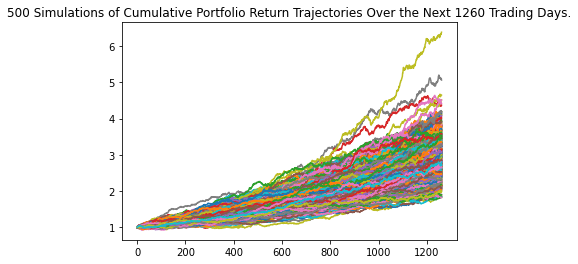

In [31]:
# Plot simulation outcomes
line_plot = Mc_five_year.plot_simulation()

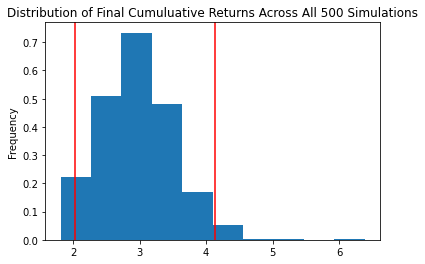

In [32]:
# Plot probability distribution and confidence intervals
dist_plot = Mc_five_year.plot_distribution()

In [33]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl5 = Mc_five_year.summarize_cumulative_return()

# Print summary statistics
print(tbl5)

count           500.000000
mean              2.974288
std               0.561867
min               1.810221
25%               2.587461
50%               2.941545
75%               3.325681
max               6.389286
95% CI Lower      2.026618
95% CI Upper      4.130740
Name: 1260, dtype: float64


In [34]:
# Set initial investment
initial_investment5 = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(tbl5[8]*60000,2)
ci_upper_five = round(tbl5[9]*60000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment5} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $121597.06 and $247844.4


### Ten Years Retirement Option

In [35]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
Mc_ten_year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252 * 10

)

In [36]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
Mc_ten_year.portfolio_data.head()

AGG                                      \
                             open     high       low   close   volume   
time                                                                    
2020-11-20 00:00:00-05:00  118.19  118.340  118.1300  118.29  5496191   
2020-11-23 00:00:00-05:00  118.28  118.300  118.1734  118.27  3844326   
2020-11-24 00:00:00-05:00  118.24  118.280  118.0700  118.09  4113975   
2020-11-25 00:00:00-05:00  118.15  118.210  118.0200  118.08  3739909   
2020-11-27 00:00:00-05:00  118.25  118.285  118.2200  118.27  4646812   

                                           SPY                            \
                          daily_return    open     high      low   close   
time                                                                       
2020-11-20 00:00:00-05:00          NaN  357.50  357.720  355.250  355.34   
2020-11-23 00:00:00-05:00    -0.000169  357.28  358.790  354.865  357.47   
2020-11-24 00:00:00-05:00    -0.001522  360.21  363.805  359.290  363.19   
2020-11-25 00:00:00-05:00    -0.000085  363.13  363.160  361.480  362.65   
2020-11-27 00:00:00-05:00     0.001609  363.84  364.180  362.580  363.65   

                                                  
                             volume daily_return  
time                                              
2020-11-20 00:00:00-05:00  47947194          NaN  
2020-11-23 00:00:00-05:00  49938331     0.005994  
2020-11-24 00:00:00-05:00  49862168     0.016001  
2020-11-25 00:00:00-05:00  35309156    -0.001487  
2020-11-27 00:00:00-05:00  46840189     0.002757

In [37]:
Mc_ten_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.000230,0.999393,1.007815,1.000180,1.003714,0.992538,0.997056,1.008756,1.001393,1.010063,...,1.002900,1.006091,1.000548,1.007143,0.995049,1.006630,1.001538,1.006945,1.003972,1.001188
2,1.008941,0.991036,1.008467,1.000772,1.008318,0.994511,0.996174,1.014661,1.001923,1.001169,...,1.006554,1.007533,0.995409,1.014735,0.999716,1.006032,1.000434,1.007593,1.006766,1.000904
3,1.008787,0.990388,1.000733,0.997275,1.002602,0.999445,0.997513,1.017146,1.002237,0.995713,...,1.005934,1.010597,0.992987,1.014779,1.004229,1.015724,1.007088,1.004873,1.014148,1.000641
4,1.000984,0.994480,1.002329,0.992460,1.009447,1.000032,1.001226,1.023683,0.998965,0.993726,...,1.009626,1.014577,1.004011,1.009110,0.998994,1.023428,1.005093,1.004612,1.011937,1.011613
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,10.539668,6.062857,18.222676,6.388812,9.312321,8.214726,7.354351,8.968737,10.846682,12.372309,...,8.666033,5.607641,12.945952,8.812534,6.440806,5.630872,4.075252,8.902728,7.567592,13.027255
2517,10.473366,6.054645,18.069927,6.410408,9.345495,8.234410,7.374220,9.002795,10.850504,12.309827,...,8.663009,5.588091,12.923013,8.939810,6.476808,5.595927,4.082962,8.830190,7.534540,13.073098
2518,10.560886,6.053850,18.302964,6.435898,9.322175,8.176013,7.419410,8.990081,10.854280,12.350945,...,8.688772,5.607875,13.021850,8.914274,6.521759,5.593470,4.113768,8.858499,7.523591,12.956337
2519,10.577986,5.994370,18.232028,6.428472,9.273292,8.151600,7.426289,9.009443,10.797057,12.343986,...,8.681898,5.642147,13.086316,8.983071,6.517251,5.571512,4.099755,8.866383,7.584620,12.906915


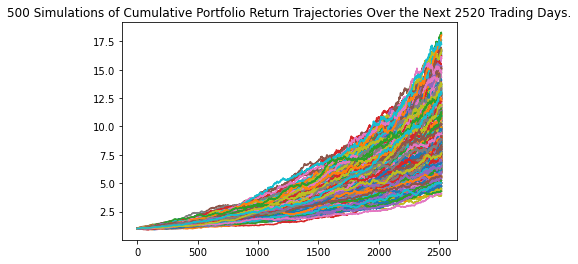

In [38]:
# Plot simulation outcomes
line_plot = Mc_ten_year.plot_simulation()

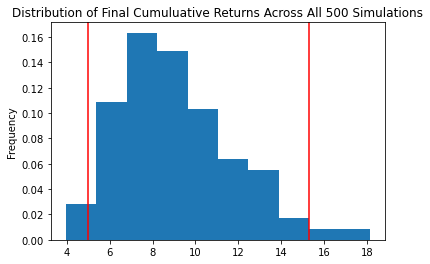

In [39]:
# Plot probability distribution and confidence intervals
dist_plot = Mc_ten_year.plot_distribution()

In [40]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl10 = Mc_ten_year.summarize_cumulative_return()

# Print summary statistics
print(tbl10)

count           500.000000
mean              9.093895
std               2.656494
min               3.950401
25%               7.088732
50%               8.682406
75%              10.668637
max              18.152787
95% CI Lower      5.006371
95% CI Upper     15.290497
Name: 2520, dtype: float64


In [41]:
# Set initial investment
initial_investment10 = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(tbl5[8]*60000,2)
ci_upper_ten = round(tbl5[9]*60000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 10 years will end within in the range of $121597.06 and $247844.4
